In [2]:
# Imported all necessary packages 
import numpy as np
import pandas as pd
import requests
import math
from astropy.constants import sigma_sb, L_sun
from bs4 import BeautifulSoup as BS

# Imported viusal pacakges 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import cm

In [3]:
# Read in new dataframe from Data cleaning/preprocessing step
HZ_final = pd.read_csv('HZ_final.csv')

In [4]:
# Dropped the unecessary column named Unnamed: 0
HZ_final.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
# Created a new column to plot an HR diagram, which is the log 10 of the luminosities
HZ_final['log_lum'] = np.log(HZ_final.st_lum)

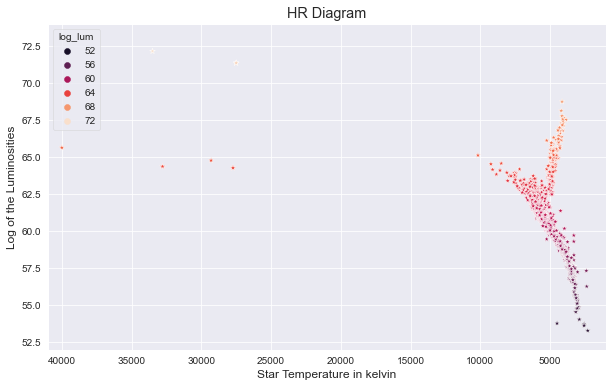

In [6]:
# The visual shows the HR diagram, which is the Effective Surface Tempertures vs the Log of the Luminosities
# Clearly we see that the majority of our host stars are in the range of G, K, M spectral types
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(ax = ax, x = 'st_teff', y = 'log_lum', data = HZ_final, marker='*', hue = 'log_lum', palette="rocket")
ax.set_ylim(52,74)
ax.set_xlim(41000, 1000)
ax.set_title('HR Diagram')
ax.set_xlabel('Star Temperature in kelvin')
ax.set_ylabel('Log of the Luminosities')
plt.savefig('HR_diagram.png');

In [7]:
#Grabbed all the spectral types
spec_list_values = HZ_final.spec_type.values

In [8]:
#Created an empty dictionary to append all the amount of spectral types
spec_ty_count = {}

# iterate through all the values from the spectral column and append them to the empty dictionary 
for i in range(65, 87):
    let = chr(i)
    lst = [x for x in spec_list_values if x.startswith(let)]
    if lst:
        spec_ty_count[let] = lst

In [9]:
# Grab just the counts for each key of the spectral types to then graph a distrubtion of the of number of 
# host stars that have exoplanets 
spec_count = {k: len(v) for k, v in spec_ty_count.items()}

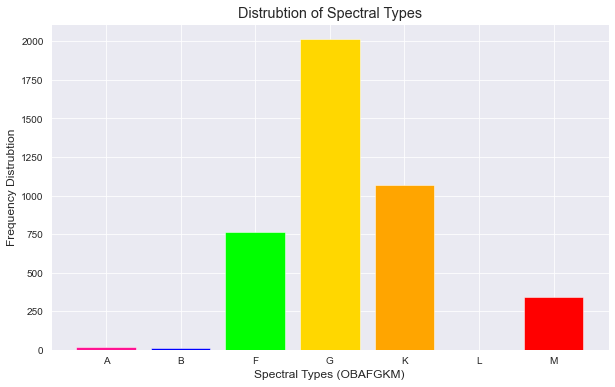

In [12]:
# Plot distrubtion of the number of stars that have exoplanets around them
# We see a lot of stars of G, F, M type stars that have the most amount of exoplanets around them
# looking at our own solar system, we expect this type of range of spectral type stars to allow exoplanets to exist

c = ['deeppink', 'blue', 'lime', 'gold', 'orange', 'peru', 'red']

fig, ax = plt.subplots(figsize = (10, 6))
ax.bar(spec_count.keys(), spec_count.values(), color=c)
ax.set_title('Distrubtion of Spectral Types')
ax.set_xlabel('Spectral Types (OBAFGKM)')
ax.set_ylabel('Frequency Distrubtion')
plt.savefig('Dist_Spec_Types.png')
plt.show();

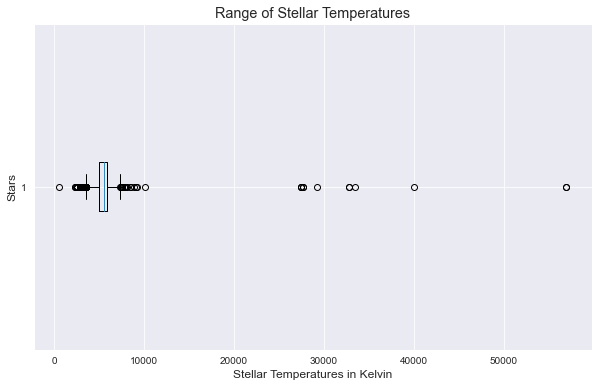

In [13]:
# Check for outliers in the host stars with their effective surface temperatures
# These are B and A type stars which are much hotter in temperature which are rare to host explanets
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(HZ_final.st_teff, vert = False )
ax.set_title('Range of Stellar Temperatures')
ax.set_xlabel('Stellar Temperatures in Kelvin')
ax.set_ylabel('Stars')
plt.savefig('Range_Stellar_Temps')
plt.show();

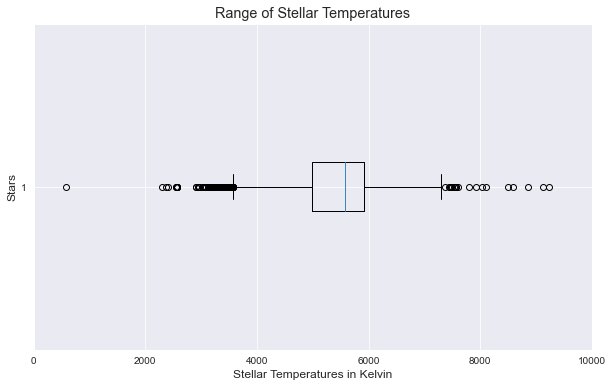

In [34]:
# Scope into the ranges of surface tempertures from the host stars, looking of the average host star that bares
# exoplanets
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(HZ_final.st_teff, vert = False )
ax.set_xlim(0, 10000)
ax.set_title('Range of Stellar Temperatures')
ax.set_xlabel('Stellar Temperatures in Kelvin')
ax.set_ylabel('Stars')
plt.savefig('Range_Stellar_Temps_close')
plt.show;

In [35]:
# Dropped name and spec type because of objeect type to then plot a heatmap for correlation 
heatmapHZ = HZ_final.drop(columns = ['pl_name', 'spec_type'])

In [36]:
# Created variable of the correlation between all the features 
corr = HZ_final.corr()

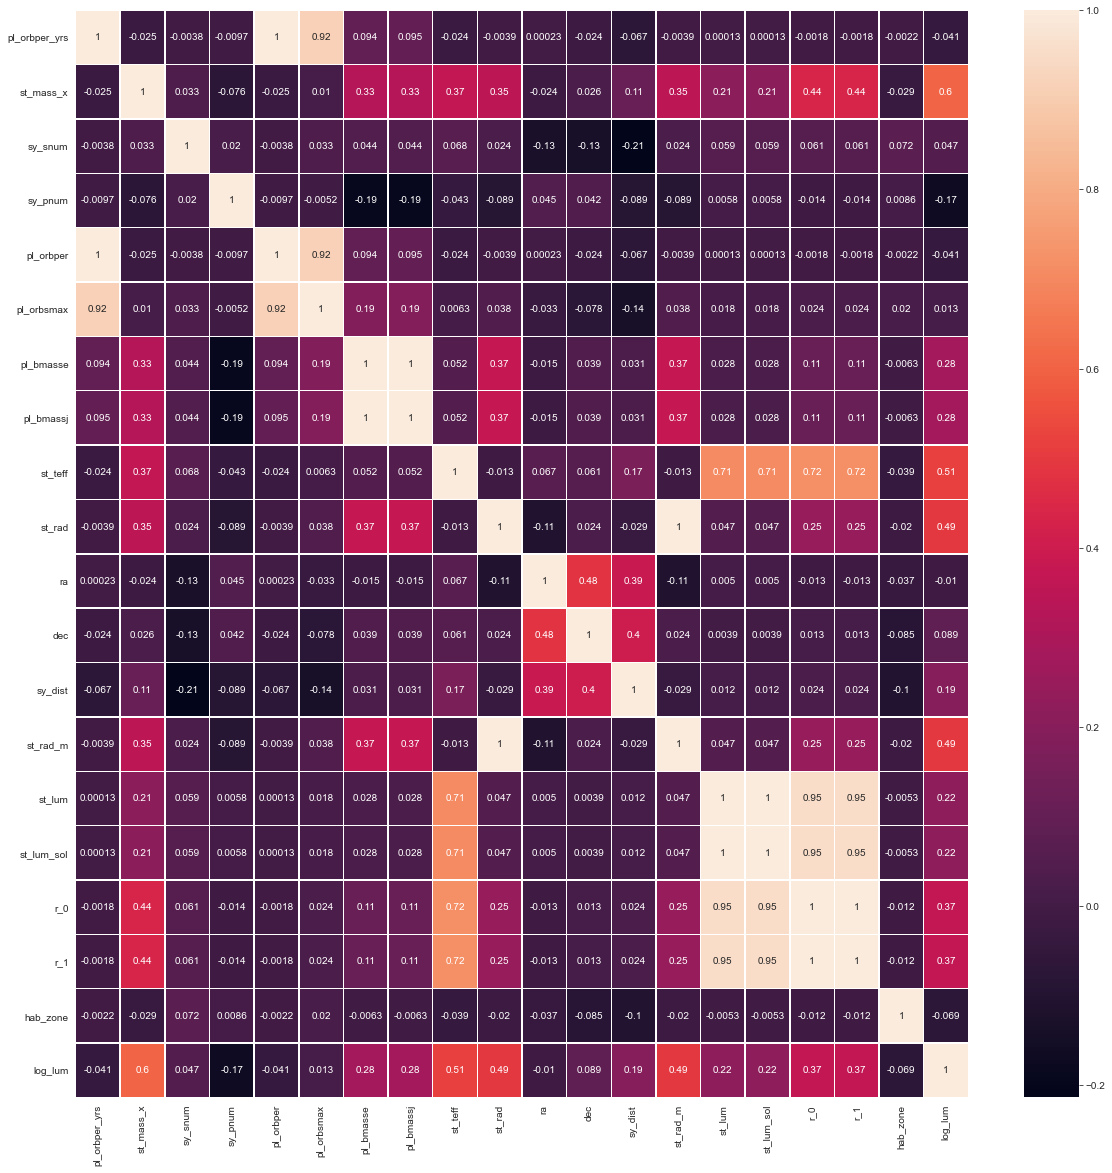

In [38]:
# Heatmap of correlation between features 
# Features used to create the target variable will be dropped when running the models
fig, ax=plt.subplots(figsize=(20,20))
ax = sns.heatmap(corr, linewidth=0.5, annot=True)
plt.savefig('heatmap')
plt.show();

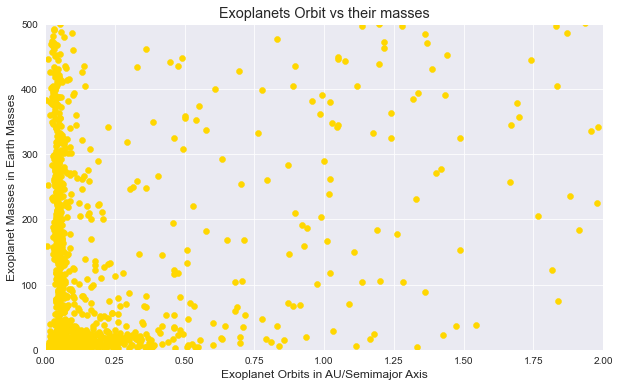

In [39]:
# Scatter plot of the exoplanets orbit versus their masses, scope in to see what the range of most of our exoplanets
# are like in nature 
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(HZ_final.pl_orbsmax, HZ_final.pl_bmasse, color='gold' )
ax.set_xlim(0, 2)
ax.set_ylim(0, 500)
ax.set_title('Exoplanets Orbit vs their masses')
ax.set_xlabel('Exoplanet Orbits in AU/Semimajor Axis')
ax.set_ylabel('Exoplanet Masses in Earth Masses');

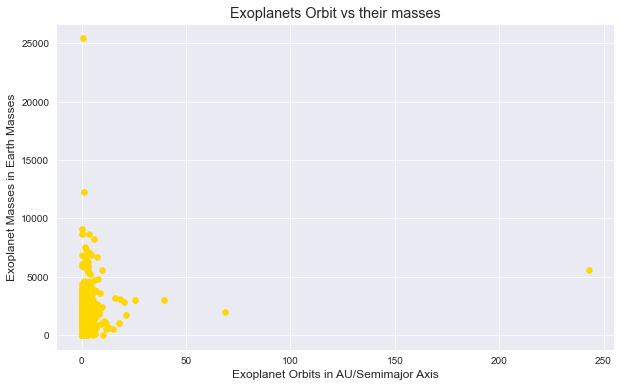

In [40]:
# Same graph as above, but to look for outliers
# we see most of our exoplanets have an AU distance between 0.01 to 4 au of their host star
# and also having masses that are right between Earth's mass and 500 times greater, called super Earth's
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(HZ_final.pl_orbsmax, HZ_final.pl_bmasse, color='gold')
ax.set_title('Exoplanets Orbit vs their masses')
ax.set_xlabel('Exoplanet Orbits in AU/Semimajor Axis')
ax.set_ylabel('Exoplanet Masses in Earth Masses');

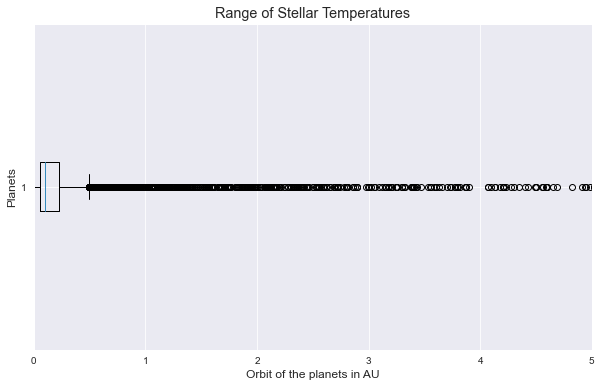

In [41]:
# Checking for outliers in planets semimajor axis 
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(HZ_final.pl_orbsmax, vert = False )
ax.set_xlim(0,5)
ax.set_title('Range of Stellar Temperatures')
ax.set_xlabel('Orbit of the planets in AU')
ax.set_ylabel('Planets')
plt.savefig('RangeExoplanetOrbits')
plt.show();

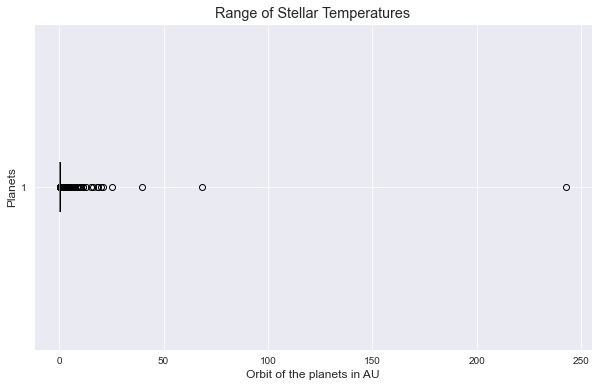

In [42]:
# Checking for outliers in semimajor axis, this could be planets orbiting neutron stars or pulsars
# Further analysis will be needed 
fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(HZ_final.pl_orbsmax, vert = False )
ax.set_title('Range of Stellar Temperatures')
ax.set_xlabel('Orbit of the planets in AU')
ax.set_ylabel('Planets');

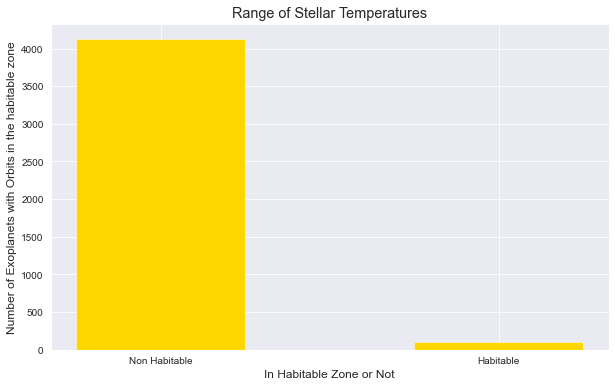

In [43]:
# Show the class imbalance between the number of planets that are within the habitable zone in comparison to those
# who are not
c = ('')

fig, ax = plt.subplots(figsize = (10, 6))
ax.bar(['Non Habitable', 'Habitable'], HZ_final.hab_zone.value_counts().values, width = 0.5, color = 'gold')
ax.set_title('Range of Stellar Temperatures')
ax.set_xlabel('In Habitable Zone or Not')
ax.set_ylabel('Number of Exoplanets with Orbits in the habitable zone')
plt.savefig('Class_Imbalance.png')
plt.show();

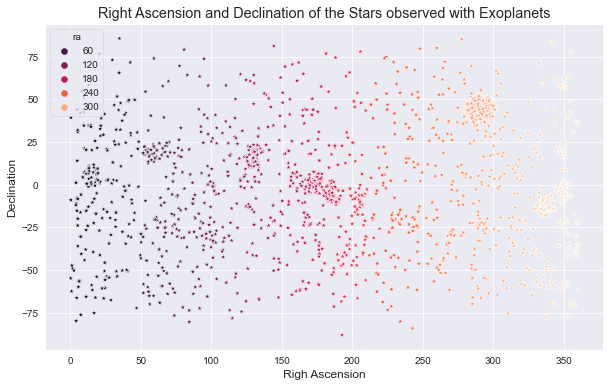

In [44]:
# Plot of where in the night sky are these exoplanets being observed within our galaxy
fig, ax = plt.subplots(figsize = (10, 6))
sns.scatterplot(ax = ax, x = 'ra', y = 'dec', data = HZ_final, marker='*', hue ='ra', palette="rocket")
ax.set_title('Right Ascension and Declination of the Stars observed with Exoplanets')
ax.set_xlabel('Righ Ascension')
ax.set_ylabel('Declination')
plt.savefig('RA_DEC_map.png')
plt.show();

In [29]:
HZ_final[HZ_final['hab_zone'] == 1]

,pl_name,pl_orbper_yrs,st_mass_x,sy_snum,sy_pnum,pl_orbper,pl_orbsmax,pl_bmasse,pl_bmassj,st_teff,...,dec,sy_dist,spec_type,st_rad_m,st_lum,st_lum_sol,r_0,r_1,hab_zone,log_lum
23,55 Cnc f,0.713981,0.910,2,5,260.781667,0.776350,47.476517,0.149367,5234.4,...,28.329815,12.58550,G,665089200.0,2.366187e+26,0.618126,1.079942,0.749622,1,60.728492
37,BD+14 4559 b,0.736318,0.675,1,1,268.940000,0.778500,398.866600,1.255000,4936.0,...,14.689383,49.35200,K2 V,629608500.0,1.676731e+26,0.438017,0.909092,0.631029,1,60.384058
50,BD-08 2823 c,0.650513,0.740,1,2,237.600000,0.680000,104.000000,0.330000,4746.0,...,-9.516569,41.33420,K3 V,626130000.0,1.417299e+26,0.370245,0.835809,0.580161,1,60.215966
103,EPIC 201238110 b,0.077119,0.410,1,1,28.167600,0.181178,NaN,NaN,3587.0,...,-3.389461,159.25900,M,257409000.0,7.816180e+24,0.020418,0.196279,0.136243,1,57.318238
135,GJ 1061 d,0.035677,0.120,1,3,13.031000,0.054000,1.640000,0.005160,2953.0,...,-44.514310,3.67278,M5.5 V,111312000.0,6.713660e+23,0.001754,0.057525,0.039930,1,54.863601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3874,PSR B1257+12 b,0.069270,1.400,1,3,25.301000,0.190000,0.017500,0.000055,3300.0,...,12.682353,600.00000,M,347850000.0,1.022495e+25,0.026711,0.224495,0.155829,1,57.586873
3882,Proxima Cen b,0.030625,0.120,3,1,11.185750,0.048500,1.270000,0.004000,3050.0,...,-62.676182,1.30119,M5.5 V,100876500.0,6.274816e+23,0.001639,0.055613,0.038603,1,54.796001
3968,TRAPPIST-1 e,0.016700,0.085,1,7,6.099615,0.028726,0.696000,0.002190,2559.0,...,-5.043462,NaN,M,83484000.0,2.129655e+23,0.000556,0.032399,0.022489,1,53.715417
4100,WASP-41 c,1.152635,0.930,1,2,421.000000,1.070000,1010.699400,3.180000,5545.0,...,-30.639818,163.37100,G,605259000.0,2.467802e+26,0.644671,1.102888,0.765549,1,60.770540
